In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [3]:
# Read sales and weather data
df_sales = pd.read_csv('sales_data_modified.csv', parse_dates=['invoice_date'])
df_weather = pd.read_csv('weather_data.csv', parse_dates=['date'])

In [4]:
df_sales

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
146666,I986197,C793506,Female,28,Food & Beverage,5,26.15,Credit Card,2024-01-15,Zorlu Center
146667,I855732,C417341,Male,63,Books,1,60.60,Debit Card,2024-01-15,Cevahir AVM
146668,I469064,C794451,Female,31,Technology,5,4200.00,Debit Card,2024-01-15,Metropol AVM
146669,I997957,C179229,Male,18,Toys,5,71.68,Credit Card,2024-01-15,Forum Istanbul


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146671 entries, 0 to 146670
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_no      146671 non-null  object        
 1   customer_id     146671 non-null  object        
 2   gender          146671 non-null  object        
 3   age             146671 non-null  int64         
 4   category        146671 non-null  object        
 5   quantity        146671 non-null  int64         
 6   price           145205 non-null  float64       
 7   payment_method  146671 non-null  object        
 8   invoice_date    146671 non-null  datetime64[ns]
 9   shopping_mall   146671 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 11.2+ MB


In [6]:
df_sales.describe()

,age,quantity,price,invoice_date
count,146671.000000,146671.000000,145205.000000,146671
mean,43.441055,3.003579,718.807499,2022-08-01 04:35:09.963114752
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,40.660000,2021-10-23 00:00:00
50%,43.000000,3.000000,179.200000,2022-08-12 00:00:00
75%,56.000000,4.000000,1200.320000,2023-05-17 00:00:00
max,69.000000,5.000000,15750.000000,2024-01-15 00:00:00
std,15.004247,1.413662,1056.058692,NaN


In [7]:
df_weather

,date,temperature_2m_max,temperature_2m_min,rain_sum
0,2021-01-01 00:00:00+00:00,13.806000,7.756000,4.200000
1,2021-01-02 00:00:00+00:00,15.906000,5.656000,0.000000
2,2021-01-03 00:00:00+00:00,14.456000,8.256001,0.200000
3,2021-01-04 00:00:00+00:00,15.556000,8.756001,0.000000
4,2021-01-05 00:00:00+00:00,14.756001,7.656000,1.600000
...,...,...,...,...
1106,2024-01-12 00:00:00+00:00,6.756000,-0.894000,0.500000
1107,2024-01-13 00:00:00+00:00,3.956000,-1.644000,0.000000
1108,2024-01-14 00:00:00+00:00,7.456000,-2.244000,0.000000
1109,2024-01-15 00:00:00+00:00,11.806000,6.556000,0.200000


In [8]:
df_weather.describe()

,temperature_2m_max,temperature_2m_min,rain_sum
count,1111.000000,1111.000000,1111.000000
mean,18.993759,11.731968,2.112961
std,7.890963,6.806037,5.201321
min,0.906000,-6.444000,0.000000
25%,13.006001,6.556000,0.000000
50%,18.806000,11.506001,0.000000
75%,25.556000,17.606000,1.500000
max,38.806000,24.556000,57.700000


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   date                1111 non-null   datetime64[ns, UTC]
 1   temperature_2m_max  1111 non-null   float64            
 2   temperature_2m_min  1111 non-null   float64            
 3   rain_sum            1111 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 34.8 KB


## Handle missing data

In [10]:
def check_missing_values(df):
    """Check missing values"""
    return pd.DataFrame(
        {
            'counts': df.isna().sum(),
            'ratio (%)': np.round(df.isna().sum() / len(df)) * 100
        }
    )

In [11]:
# Check missing data for weather data
check_missing_values(df_weather)

,counts,ratio (%)
date,0,0.0
temperature_2m_max,0,0.0
temperature_2m_min,0,0.0
rain_sum,0,0.0


In [12]:
# Check missing data for sales data
check_missing_values(df_sales)

,counts,ratio (%)
invoice_no,0,0.0
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,1466,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


In [13]:
def fill_missing_values(df):
    """Fill Nan Values in 'price' column with the mean of non-NaN values"""
    df_filled = df.copy()
    df_filled['price'].fillna(df_filled['price'].mean(), inplace=True)
    return df_filled

In [14]:
df_sales = fill_missing_values(df_sales)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146671 entries, 0 to 146670
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_no      146671 non-null  object        
 1   customer_id     146671 non-null  object        
 2   gender          146671 non-null  object        
 3   age             146671 non-null  int64         
 4   category        146671 non-null  object        
 5   quantity        146671 non-null  int64         
 6   price           146671 non-null  float64       
 7   payment_method  146671 non-null  object        
 8   invoice_date    146671 non-null  datetime64[ns]
 9   shopping_mall   146671 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 11.2+ MB


In [15]:
check_missing_values(df_sales)

,counts,ratio (%)
invoice_no,0,0.0
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,0,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


## Handle Outliers

/tmp/ipykernel_6199/3752976595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=df_sales, palette='Set2')


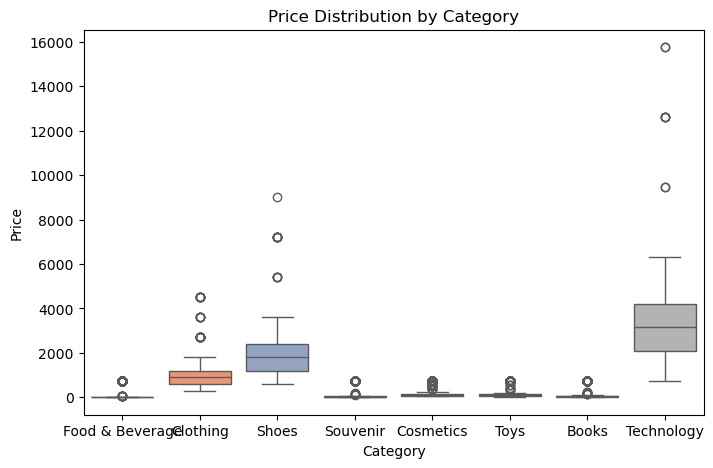

In [16]:
## Price distribution by Category and detect outlier
plt.figure(figsize=(8,5))
sns.boxplot(x='category', y='price', data=df_sales, palette='Set2')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

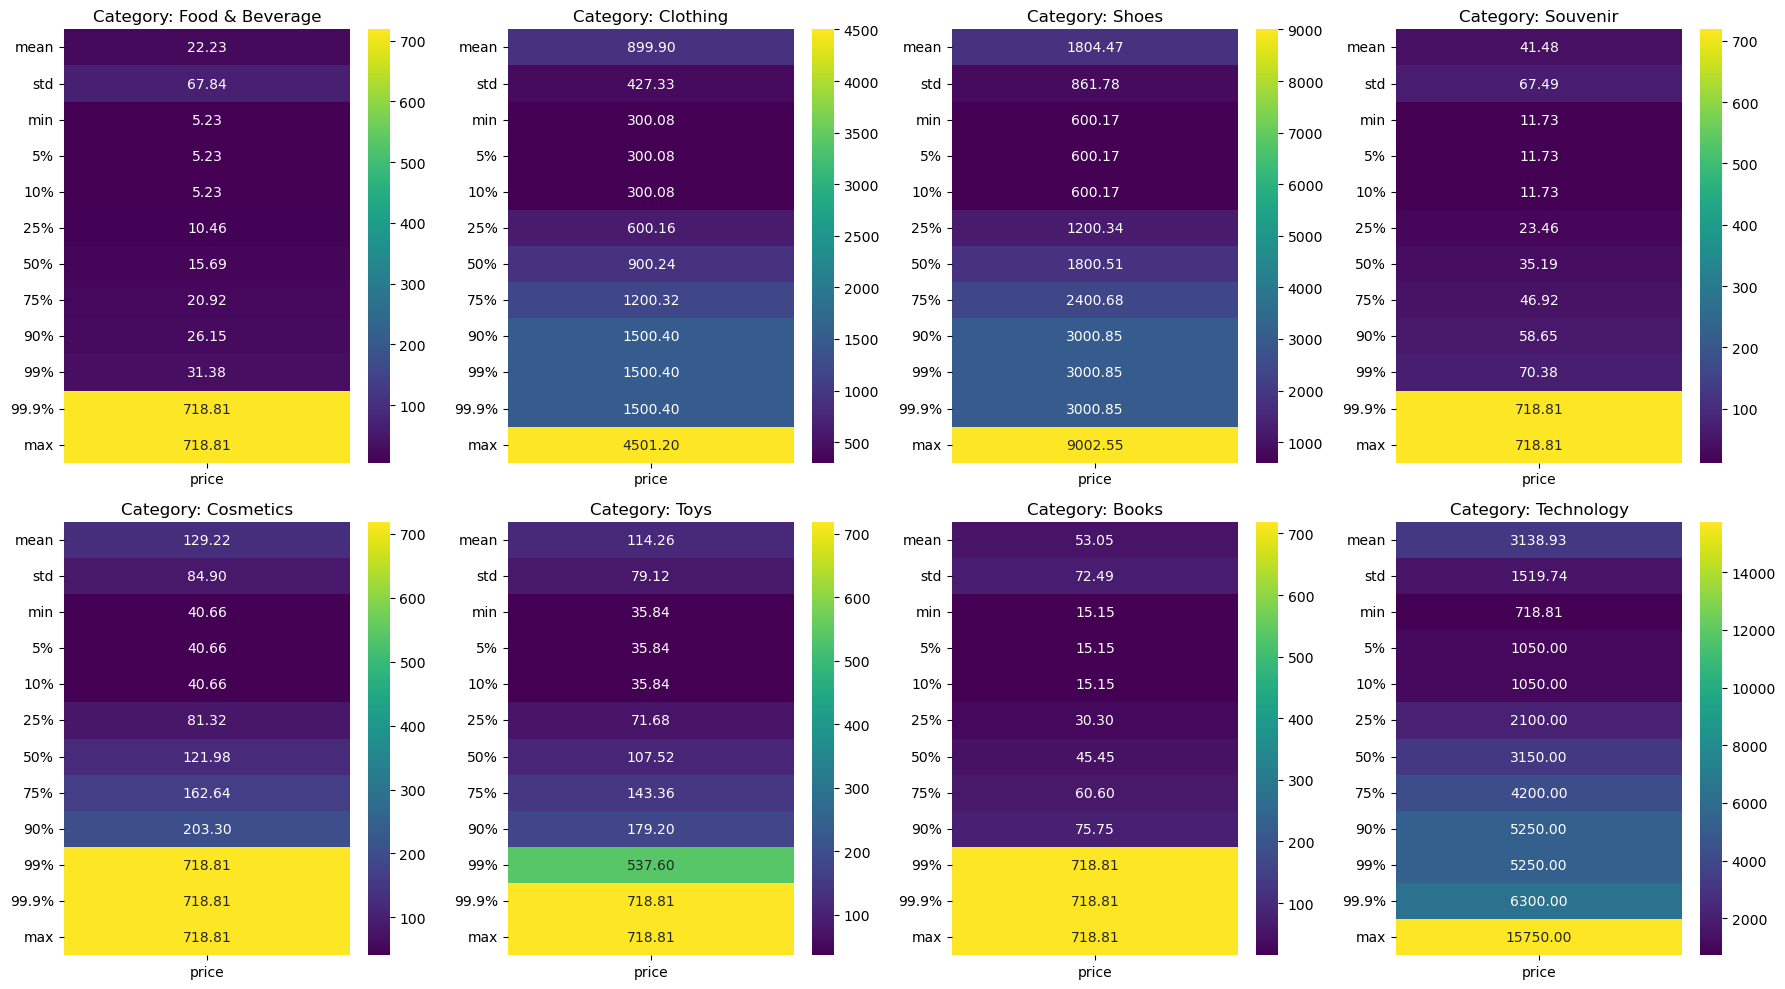

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = df_sales['category'].unique()

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

axes = axes.flatten()   # chuyển 2D → 1D để loop cho dễ

for i, category in enumerate(categories):
    stats = (
        df_sales[df_sales['category'] == category][['price']]
        .describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999])
        .iloc[1:]  # bỏ count
    )

    sns.heatmap(stats, ax=axes[i], annot=True, cmap="viridis", fmt=".2f")
    axes[i].set_title(f"Category: {category}")

plt.tight_layout()
plt.show()


In [18]:
def correct_outliers(df, factor=3):
    """Identify and correct outliers in the 'sales' column by reducing them to the mean"""
    df_corrected = df.copy()

    #Indentify outliers using z-score
    z_scores = (df_corrected['price'] - df_corrected['price'].mean()) / df_corrected['price'].std()
    outlier_indices = abs(z_scores) > 3
    df_corrected.loc[outlier_indices, 'price'] = df_corrected['price'].mean()

    return df_corrected

In [19]:
df_corrected = correct_outliers(df_sales)
df_corrected

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.150000,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.320000,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.240000,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.920000,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.080000,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
146666,I986197,C793506,Female,28,Food & Beverage,5,26.150000,Credit Card,2024-01-15,Zorlu Center
146667,I855732,C417341,Male,63,Books,1,60.600000,Debit Card,2024-01-15,Cevahir AVM
146668,I469064,C794451,Female,31,Technology,5,718.807499,Debit Card,2024-01-15,Metropol AVM
146669,I997957,C179229,Male,18,Toys,5,71.680000,Credit Card,2024-01-15,Forum Istanbul


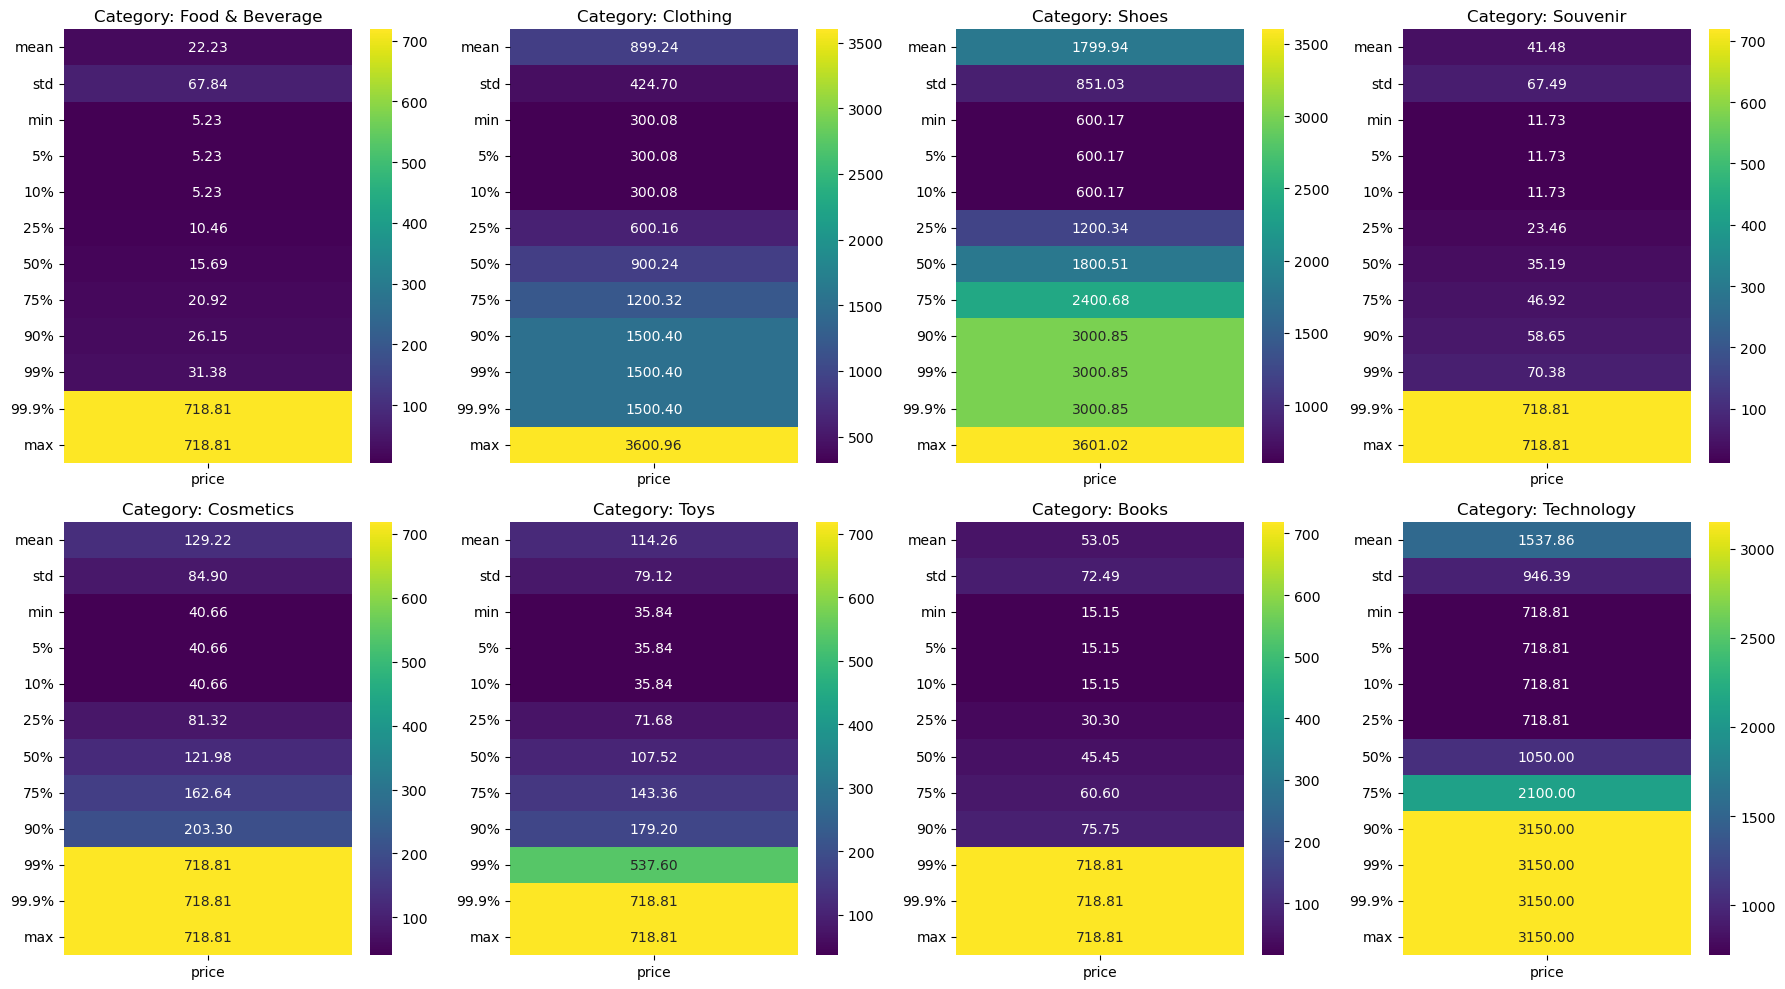

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = df_corrected['category'].unique()

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

axes = axes.flatten()   # chuyển 2D → 1D để loop cho dễ

for i, category in enumerate(categories):
    stats = (
        df_corrected[df_corrected['category'] == category][['price']]
        .describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999])
        .iloc[1:]  # bỏ count
    )

    sns.heatmap(stats, ax=axes[i], annot=True, cmap="viridis", fmt=".2f")
    axes[i].set_title(f"Category: {category}")

plt.tight_layout()
plt.show()


## Saving preprocesed data

In [21]:
df_corrected.to_csv('sales_data_preprocessed.csv', index=False)